# Predicting Pest Counts - NH farms 

# Ram Gautam 

In [191]:
import pandas as pd 
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [192]:
import  seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# 1. Multiple Linear Regression 

In [287]:
def Multiple_Linear_Regression(df_LinearRegression):
    #print (df_CEW_final.head())
    #print("Calling Multiple Linear Regression Modle")
    #print(sns.distplot(df_CEW_final['trap_count']))
    X_LR = df_LinearRegression[['tempf', 'dwpf', 'drct', 'feel']]
    y_LR = df_LinearRegression['trap_count']
    
    #splitting data into training and testing data
    X_train_lm, X_test_lm, y_train_lm,y_test_lm = train_test_split(X_LR,y_LR, test_size = 0.2, random_state = 101)
    #traing the data into the model
    regressionModel = LinearRegression()
    regressionModel.fit(X_train_lm, y_train_lm)
    
    #get the intercept
    print("Intercept: " , regressionModel.intercept_)
    
    #get the coeffecients
    print("Coeffecients " , regressionModel.coef_)
    
    #do the predictions - we need to pass the featuress that the model never seen before
    predictions = regressionModel.predict(X_test_lm)
    predictions_ret = regressionModel.predict(X_LR)
    print(predictions.shape)
    
    #print(y_test_lm)
    
    #cheking with the sctter plot 
    plt.scatter(y_test_lm , predictions)
    
    print("----------- Linear Regression Evaluations------------")
    print("Mean Absolute Error (MAE): ", metrics.mean_absolute_error(y_test_lm , predictions))
    print("Mean Squared Eror (MSE): ", metrics.mean_squared_error(y_test_lm , predictions))
    print("Root Mean Squared Eror (RMSE): ", np.sqrt(metrics.mean_squared_error(y_test_lm , predictions)))
    
    #sns.distplot((y_test_lm - predictions))
    df_LinearRegression['regression_count'] = predictions_ret
    
    return df_LinearRegression


In [237]:
#reading the data frame
df = pd.read_csv('pest_traps.csv', header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])

In [238]:
df.shape

(12434, 7)

# Building dataframe for the pest CEW

In [239]:
#dividing the dataframe based on each pests - pest CEW
df_CEW = df.loc[['CEW'], ['farm', 'trap_count','year','date']]

In [240]:
df_CEW.head()

,farm,trap_count,year,date
pest,,,,
CEW,Pelham-G,0,2006,20060619
CEW,Litchfield-W,0,2006,20060619
CEW,Litchfield-M,0,2006,20060619
CEW,Merrimack-T,0,2006,20060619
CEW,Hollis-L,1,2006,20060619


In [241]:
df_CEW.tail()

,farm,trap_count,year,date
pest,,,,
CEW,Hollis-K,3,2018,20181008
CEW,Hollis-B2,0,2018,20181008
CEW,Hollis-L,8,2018,20181008
CEW,Hollis-K,3,2018,20181015
CEW,Hollis-L,2,2018,20181015


In [242]:
df_CEW.shape

(3626, 4)

In [243]:
from datetime import date 

def compute_weeks(startDate, endDate):
    s_yyyy = str(startDate)[0:4]
    s_mm = str(startDate)[5:7]
    s_dd = str(startDate)[8:10]
            
    d1 = date(int(s_yyyy),int(s_mm),int(s_dd))
    
    e_yyyy = str(endDate)[0:4]
    e_mm = str(endDate)[5:7]
    e_dd = str(endDate)[8:10]
            
    d2 = date(int(e_yyyy),int(e_mm),int(e_dd))
    
    return (int((d2-d1).days / 7))
            
def convert_pandasDate(change_date):
    change_date = str(change_date)[:4] + "/" + str(change_date)[4:6] + "/" + str(change_date)[6:8]
    change_date = pd.to_datetime(change_date)
    return (change_date)
    

In [244]:
start_cew_date = df_CEW['date'].values[0]
search_cew_STdate = convert_pandasDate(start_cew_date)

end_cew_date = df_CEW['date'].values[3626-1]
search_cew_ENDdate = convert_pandasDate(end_cew_date)

df_CEW['date'] = df_CEW['date'].apply(convert_pandasDate)
#df_CEW['date'] = pd.to_datetime(df_CEW['date'])

print(search_cew_STdate)
print(search_cew_ENDdate)

print("total weeeks " , compute_weeks(search_cew_STdate, search_cew_ENDdate))

2006-06-19 00:00:00
2018-10-15 00:00:00
total weeeks  643


In [245]:
df_CEW['date'] = pd.to_datetime(df_CEW['date'])

# Building dataframe for the pest ECB  

In [246]:
#dividing the dataframe based on each pests - pest ECB
df_ECB = df.loc[['ECB'], ['farm', 'trap_count','year','date']]

In [247]:
df_ECB.head()

,farm,trap_count,year,date
pest,,,,
ECB,Litchfield-W,16,2006,20060619
ECB,Hollis-B,7,2006,20060619
ECB,Mason-B,11,2006,20060619
ECB,Litchfield-W,25,2006,20060626
ECB,Hollis-B,31,2006,20060626


In [248]:
df_ECB.tail()

,farm,trap_count,year,date
pest,,,,
ECB,Hollis-JL-Pl,0,2018,20180924
ECB,Peterborough-R,0,2018,20180924
ECB,Mason-B,0,2018,20180924
ECB,NewIpswich-B,0,2018,20180924
ECB,Milford-M,0,2018,20180924


In [249]:
df_ECB.shape

(4979, 4)

In [250]:
start_ecb_date = df_ECB['date'].values[0]
search_ecb_STdate = convert_pandasDate(start_cew_date)

end_ecb_date = df_ECB['date'].values[4979-1]
search_ecb_ENDdate = convert_pandasDate(end_cew_date)

df_ECB['date'] = df_ECB['date'].apply(convert_pandasDate)

print(search_ecb_STdate)
print(search_ecb_ENDdate)

print("total weeeks " , compute_weeks(search_ecb_STdate, search_ecb_ENDdate))

2006-06-19 00:00:00
2018-10-15 00:00:00
total weeeks  643


In [251]:
df_ECB['date'] = pd.to_datetime(df_ECB['date'])

# Building dataframe for the pest FAW

In [252]:
#dividing the dataframe based on each pests - pest FAW
df_FAW = df.loc[['FAW'], ['farm', 'trap_count','year','date']]

In [253]:
df_FAW.head()

,farm,trap_count,year,date
pest,,,,
FAW,Pelham-G,0,2006,20060619
FAW,Litchfield-W,0,2006,20060619
FAW,Litchfield-M,0,2006,20060619
FAW,Merrimack-T,0,2006,20060619
FAW,Hollis-L,0,2006,20060619


In [254]:
df_FAW.tail()

,farm,trap_count,year,date
pest,,,,
FAW,Antrim-T,0,2018,20181001
FAW,Milford-M,0,2018,20181001
FAW,Hollis-B2,0,2018,20181008
FAW,Hollis-L,2,2018,20181008
FAW,Hollis-L,3,2018,20181015


In [255]:
df_FAW.shape

(3829, 4)

In [256]:
start_faw_date = df_FAW['date'].values[0]
search_faw_STdate = convert_pandasDate(start_cew_date)

end_faw_date = df_FAW['date'].values[3829-1]
search_faw_ENDdate = convert_pandasDate(end_cew_date)

df_FAW['date'] = df_FAW['date'].apply(convert_pandasDate)

print(search_faw_STdate)
print(search_faw_ENDdate)

print("total weeeks " , compute_weeks(search_faw_STdate, search_faw_ENDdate))

2006-06-19 00:00:00
2018-10-15 00:00:00
total weeeks  643


In [257]:
df_FAW['date'] = pd.to_datetime(df_FAW['date'])

# NOAA DATA

In [258]:
df_NOOA = pd.read_csv('DAW.csv', header=0)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7,15,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [259]:
df_NOOA.shape

(473979, 29)

In [260]:
df_NOOA.columns

Index(['station', 'valid', 'tmpf', 'dwpf', 'relh', 'drct', 'sknt', 'p01i',
       'alti', 'mslp', 'vsby', 'gust', 'skyc1', 'skyc2', 'skyc3', 'skyc4',
       'skyl1', 'skyl2', 'skyl3', 'skyl4', 'wxcodes', 'ice_accretion_1hr',
       'ice_accretion_3hr', 'ice_accretion_6hr', 'peak_wind_gust',
       'peak_wind_drct', 'peak_wind_time', 'feel', 'metar'],
      dtype='object')

In [261]:
df_equation  = df_NOOA[['tmpf','dwpf', 'drct','feel', 'valid']]
df_equation.head()

,tmpf,dwpf,drct,feel,valid
0,24.80,10.40,60.0,20.46,1/1/06 0:38
1,24.08,10.04,80.0,19.63,1/1/06 0:51
2,21.92,15.98,20.0,13.39,1/1/06 1:51
3,21.20,17.60,30.0,11.61,1/1/06 2:15
4,21.92,17.06,30.0,13.39,1/1/06 2:51


In [262]:
df_equation['valid'] = pd.to_datetime(df_equation['valid'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [263]:
print(search_cew_STdate)
print(search_cew_ENDdate)

2006-06-19 00:00:00
2018-10-15 00:00:00


# selecting weather dataframe within the date range - CEW Pest

In [264]:
#selecting the dataframe within the range - CEW Pest
#df_equation = df_equation.loc[(df_equation['valid'] >= search_st_date) & (df_equation['valid'] <= search_end_date), :]
df_equation = df_equation.loc[(df_equation['valid'] >= search_cew_STdate) & (df_equation['valid'] <= search_cew_ENDdate), :]

In [265]:
#need to get all the columns from here and sum up fro every week 
#select date and each column, and find the average for each column
df_tempf = df_equation[['tmpf','dwpf', 'drct','feel','valid']]
df_tempf["tmpf"] = df_tempf["tmpf"].fillna(0)
df_tempf["dwpf"] = df_tempf["dwpf"].fillna(0)
df_tempf["drct"] = df_tempf["drct"].fillna(0)
df_tempf["feel"] = df_tempf["feel"].fillna(0)

In [266]:
df_tempf.tail()

,tmpf,dwpf,drct,feel,valid
341757,0.0,0.0,0.0,0.0,2018-10-14 23:35:00
341758,0.0,0.0,190.0,0.0,2018-10-14 23:40:00
341759,0.0,0.0,0.0,0.0,2018-10-14 23:50:00
341760,46.0,39.9,0.0,46.0,2018-10-14 23:51:00
341761,0.0,0.0,0.0,0.0,2018-10-14 23:55:00


In [267]:
#df_tempf

In [268]:
from datetime import date

def getweekly_temperature(df_tempf,CEW_weather_data_dic):
    
    week_counts = 0
    
    count = 0
    temp_index = 0
     
    count_day0 = 0
    count_day1 = 0
    count_day2 = 0
    count_day3 = 0
    count_day4 = 0
    count_day5 = 0
    count_day6= 0
    totaldays = 0
    
    temperature = 0
    dewTemp = 0
    winDir = 0
    feelTemp = 0
    
    #empt sets for all the values
    lst_tempf = []
    lst_dwpf = []
    lst_drct = []
    lst_feel = []
    lst_date = []
    
    for i , j in df_tempf.iterrows():
        
        if count ==0:
            row = (i,j)
            #print(row[1][1])
            #initial_date = row[1][1]
            initial_date = row[1][4]
            f_yyyy = str(initial_date)[0:4]
            f_mm = str(initial_date)[5:7]
            f_dd = str(initial_date)[8:10]
            f_date = date(int(f_yyyy),int(f_mm),int(f_dd))
            
        row_data = (i,j)
        #print(row_data)
        #summing up the temperature
        #temperature = row_data[1][0]
        temperature = temperature + row_data[1][0]
        dewTemp = dewTemp + row_data[1][1]
        winDir = winDir + row_data[1][2]
        feelTemp = feelTemp + row_data[1][3]
        
        #last_date = row_data[1][1]
        last_date = row_data[1][4]
        l_yyyy = str(last_date)[0:4]
        l_mm = str(last_date)[5:7]
        l_dd = str(last_date)[8:10]
        l_date = date(int(l_yyyy),int(l_mm),int(l_dd))
            
        #change in date 
        delta = l_date - f_date
        #print (delta.days)
        if delta.days%7 == 0:
            week_counts = week_counts + 1
        
        if delta.days == 0:
            count_day0 = count_day0 + 1
        elif delta.days == 1:
            count_day1 = count_day1 + 1
        elif delta.days == 2:
            count_day2 = count_day2 + 1
        elif delta.days == 3:
            count_day3 = count_day3 + 1
        elif delta.days == 4:
            count_day4 = count_day4 + 1
        elif delta.days == 5:
            count_day5 = count_day5 + 1
        elif delta.days == 6:
            count_day6 = count_day6 + 1       
        #elif delta.days == 7:
        else:
            #compute average temperature
            totaldays = count_day0 + count_day1 + count_day2 + count_day3 + count_day4 + count_day5 + count_day6
            
            avg_Temp = temperature/totaldays
            avg_dewTemp = dewTemp/totaldays
            avg_winDir = winDir/totaldays
            avg_feelTemp = feelTemp/totaldays
            
            #appending values to the list
            lst_tempf.append(avg_Temp)
            lst_dwpf.append(avg_dewTemp)
            lst_drct.append(avg_winDir)
            lst_feel.append(avg_feelTemp) 
    
            lst_date.append(f_date)
            #print(f_date)
            
            #get the start date 
            #put all into the date frame 
            
            temp_index = temp_index + 1
            
            #flush the date 
            f_date = l_date
            
            #flush days count 
            count_day0 = 0
            count_day1 = 0
            count_day2 = 0
            count_day3 = 0 
            count_day4 = 0 
            count_day5 = 0
            count_day6 = 0
            
            #flushing all the records ---- temperature
            temperature = 0
            dewTemp = 0
            winDir = 0
            feelTemp = 0
            
        #initialize the repetation
        count = count + 1
        
    print("total temperature index ", temp_index)
    print("total weeks: ", week_counts)
    
    #assigning list to the dictonary
    CEW_weather_data_dic['tempf'] = lst_tempf
    CEW_weather_data_dic['dwpf'] = lst_dwpf
    CEW_weather_data_dic['drct'] = lst_drct
    CEW_weather_data_dic['feel'] = lst_feel
    CEW_weather_data_dic['date'] = lst_date
    
    #return CEW_weather_data_dic
    #print(df_tempf)

In [269]:
#calling getweekly_temperature
CEW_weather_data_dic = {}
getweekly_temperature(df_tempf,CEW_weather_data_dic)

total temperature index  642
total weeks:  47922


In [270]:
#creating data frame needed for equation
#print(CEW_weather_data_dic)
df_CEW_weather = pd.DataFrame(CEW_weather_data_dic)

In [271]:
df_CEW_weather.head()

,tempf,dwpf,drct,feel,date
0,70.977613,63.913169,63.703704,71.301399,2006-06-19
1,71.243468,65.095887,84.233871,71.733347,2006-06-26
2,71.056485,59.203758,127.515152,71.263273,2006-07-03
3,71.830909,66.491782,59.745455,72.608255,2006-07-10
4,73.200175,66.515808,101.004367,74.150786,2006-07-17


In [272]:
df_CEW_weather.tail()

,tempf,dwpf,drct,feel,date
637,6.936188,6.288330,156.129550,6.983009,2018-09-03
638,9.211018,8.905188,113.670949,9.217243,2018-09-10
639,7.760753,7.281021,110.056730,7.728195,2018-09-17
640,6.692446,6.180576,161.330935,6.548972,2018-09-24
641,7.799536,7.509856,134.674923,7.750764,2018-10-01


In [273]:
df_CEW['date'] = df_CEW['date'].dt.date

In [274]:
df_CEW_weather['date'] = pd.to_datetime(df_CEW_weather['date'])

In [275]:
df_CEW_weather['date'] = df_CEW_weather['date'].dt.date

In [276]:
df_CEW_final = df_CEW.merge(df_CEW_weather, on='date')

# predicted tarp counts :::: CEW pests

In [288]:
df_CEW_final.columns

Index(['farm', 'trap_count', 'year', 'date', 'tempf', 'dwpf', 'drct', 'feel'], dtype='object')

Intercept:  8.848344854621619
Coeffecients  [-0.71959129  0.03611909  0.02071853  0.68803956]
(515,)
----------- Linear Regression Evaluations------------
Mean Absolute Error (MAE):  14.705005947180688
Mean Squared Eror (MSE):  860.9897652483703
Root Mean Squared Eror (RMSE):  29.342627102022924


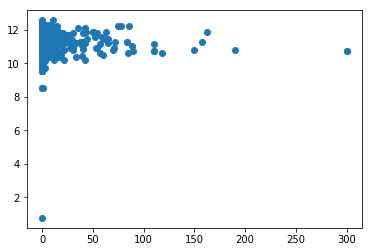

In [292]:
df_CEW_final = Multiple_Linear_Regression(df_CEW_final)

In [293]:
df_CEW_final.head()

,farm,trap_count,year,date,tempf,dwpf,drct,feel,regression_count
0,Pelham-G,0,2006,2006-06-19,70.977613,63.913169,63.703704,71.301399,10.459989
1,Litchfield-W,0,2006,2006-06-19,70.977613,63.913169,63.703704,71.301399,10.459989
2,Litchfield-M,0,2006,2006-06-19,70.977613,63.913169,63.703704,71.301399,10.459989
3,Merrimack-T,0,2006,2006-06-19,70.977613,63.913169,63.703704,71.301399,10.459989
4,Hollis-L,1,2006,2006-06-19,70.977613,63.913169,63.703704,71.301399,10.459989


In [294]:
#creating training and testign dataset 
mask = np.random.rand(len(df_CEW_final)) < 0.8
df_train_CEW = df_CEW_final[mask]
df_test_CEW = df_CEW_final[~mask]

In [295]:
df_train_CEW.head()

,farm,trap_count,year,date,tempf,dwpf,drct,feel,regression_count
0,Pelham-G,0,2006,2006-06-19,70.977613,63.913169,63.703704,71.301399,10.459989
1,Litchfield-W,0,2006,2006-06-19,70.977613,63.913169,63.703704,71.301399,10.459989
2,Litchfield-M,0,2006,2006-06-19,70.977613,63.913169,63.703704,71.301399,10.459989
3,Merrimack-T,0,2006,2006-06-19,70.977613,63.913169,63.703704,71.301399,10.459989
4,Hollis-L,1,2006,2006-06-19,70.977613,63.913169,63.703704,71.301399,10.459989


In [296]:
print(len(df_train_CEW))
print(len(df_test_CEW))

2079
492


In [297]:
expr_CEW = """trap_count ~ tempf + dwpf + drct + feel"""

In [298]:
#Set up the X and y matrices
y_train, X_train = dmatrices(expr_CEW, df_CEW_final, return_type='dataframe')
y_test, X_test = dmatrices(expr_CEW, df_CEW_final, return_type='dataframe')

#y_train, X_train = dmatrices(expr_CEW, df_train_CEW, return_type='dataframe')
#y_test, X_test = dmatrices(expr_CEW, df_test_CEW, return_type='dataframe')

In [299]:
#X_test

In [300]:
#y_test

In [301]:
#Using the statsmodels GLM class, train the Poisson regression model on the training data set.
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

In [302]:
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             trap_count   No. Observations:                 2571
Model:                            GLM   Df Residuals:                     2566
Model Family:                 Poisson   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -41041.
Date:                Tue, 05 May 2020   Deviance:                       75750.
Time:                        00:11:22   Pearson chi2:                 1.55e+05
No. Iterations:                     6   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2900      0.042     54.923      0.000       2.208       2.372
tempf         -0.0907      0.008    -12.012      0.0

In [303]:
#Make some predictions on the test data set.
poisson_predictions = poisson_training_results.get_prediction(X_test)

In [304]:
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

           mean   mean_se  mean_ci_lower  mean_ci_upper
0     10.502287  0.121299      10.267216      10.742741
1     10.502287  0.121299      10.267216      10.742741
2     10.502287  0.121299      10.267216      10.742741
3     10.502287  0.121299      10.267216      10.742741
4     10.502287  0.121299      10.267216      10.742741
5     10.502287  0.121299      10.267216      10.742741
6     10.502287  0.121299      10.267216      10.742741
7     10.502287  0.121299      10.267216      10.742741
8     10.502287  0.121299      10.267216      10.742741
9     10.502287  0.121299      10.267216      10.742741
10    10.502287  0.121299      10.267216      10.742741
11    10.824663  0.103944      10.622843      11.030318
12    10.824663  0.103944      10.622843      11.030318
13    10.824663  0.103944      10.622843      11.030318
14    10.824663  0.103944      10.622843      11.030318
15    10.824663  0.103944      10.622843      11.030318
16    10.824663  0.103944      10.622843      11

In [305]:
#predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['trap_count']

In [306]:
poisson_count = predictions_summary_frame['mean']

In [307]:
#poisson_count

In [308]:
#print(actual_counts)

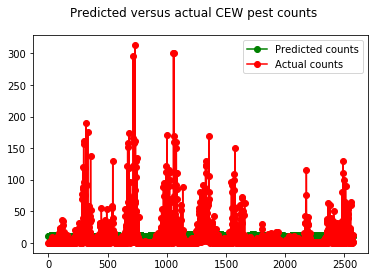

In [309]:
#Mlot the predicted counts versus the actual counts for the test data.
fig = plt.figure()
fig.suptitle('Predicted versus actual CEW pest counts ')
predicted, = plt.plot(X_test.index, poisson_count, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

<Figure size 432x288 with 0 Axes>

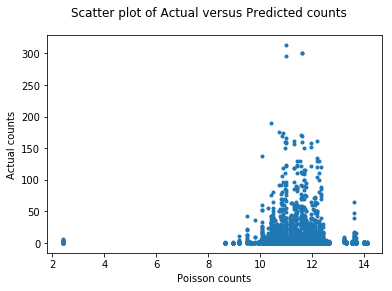

In [310]:
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=poisson_count, y=actual_counts, marker='.')
plt.xlabel('Poisson counts')
plt.ylabel('Actual counts')
plt.show()

In [311]:
#writing dataframe into csv file

In [312]:
df_CEW_final['poisson_count'] = poisson_count

In [313]:
df_CEW_final.head()

,farm,trap_count,year,date,tempf,dwpf,drct,feel,regression_count,poisson_count
0,Pelham-G,0,2006,2006-06-19,70.977613,63.913169,63.703704,71.301399,10.459989,10.502287
1,Litchfield-W,0,2006,2006-06-19,70.977613,63.913169,63.703704,71.301399,10.459989,10.502287
2,Litchfield-M,0,2006,2006-06-19,70.977613,63.913169,63.703704,71.301399,10.459989,10.502287
3,Merrimack-T,0,2006,2006-06-19,70.977613,63.913169,63.703704,71.301399,10.459989,10.502287
4,Hollis-L,1,2006,2006-06-19,70.977613,63.913169,63.703704,71.301399,10.459989,10.502287


In [314]:
#writing into the csv file
df_CEW_final.to_csv("CEW_predicted_count.csv", index = False, sep = ',')

# Negative Binomial Regression - CEW

In [315]:
#print out the fitted rate vector
print(poisson_training_results.mu)

[10.50228707 10.50228707 10.50228707 ... 11.68078149 11.68078149
 11.68078149]


In [316]:
#Add the λ vector as a new column called 'BB_LAMBDA' to the Data Frame of the training data set
df_CEW_final_NB = df_CEW_final

In [317]:
df_CEW_final_NB.head()

,farm,trap_count,year,date,tempf,dwpf,drct,feel,regression_count,poisson_count
0,Pelham-G,0,2006,2006-06-19,70.977613,63.913169,63.703704,71.301399,10.459989,10.502287
1,Litchfield-W,0,2006,2006-06-19,70.977613,63.913169,63.703704,71.301399,10.459989,10.502287
2,Litchfield-M,0,2006,2006-06-19,70.977613,63.913169,63.703704,71.301399,10.459989,10.502287
3,Merrimack-T,0,2006,2006-06-19,70.977613,63.913169,63.703704,71.301399,10.459989,10.502287
4,Hollis-L,1,2006,2006-06-19,70.977613,63.913169,63.703704,71.301399,10.459989,10.502287


In [318]:
df_CEW_final_NB['BB_LAMBDA'] = poisson_training_results.mu

In [319]:
df_CEW_final_NB.head()

,farm,trap_count,year,date,tempf,dwpf,drct,feel,regression_count,poisson_count,BB_LAMBDA
0,Pelham-G,0,2006,2006-06-19,70.977613,63.913169,63.703704,71.301399,10.459989,10.502287,10.502287
1,Litchfield-W,0,2006,2006-06-19,70.977613,63.913169,63.703704,71.301399,10.459989,10.502287,10.502287
2,Litchfield-M,0,2006,2006-06-19,70.977613,63.913169,63.703704,71.301399,10.459989,10.502287,10.502287
3,Merrimack-T,0,2006,2006-06-19,70.977613,63.913169,63.703704,71.301399,10.459989,10.502287,10.502287
4,Hollis-L,1,2006,2006-06-19,70.977613,63.913169,63.703704,71.301399,10.459989,10.502287,10.502287


In [320]:
#add a derived column called 'AUX_OLS_DEP' to the pandas Data Frame. This new column will store the values of the dependent variable of the OLS regression
df_CEW_final_NB['AUX_OLS_DEP'] = df_CEW_final_NB.apply(lambda x: ((x['poisson_count'] - x['BB_LAMBDA'])**2 - x['poisson_count']) / x['BB_LAMBDA'], axis=1)

In [321]:
df_CEW_final_NB.head()

,farm,trap_count,year,date,tempf,dwpf,drct,feel,regression_count,poisson_count,BB_LAMBDA,AUX_OLS_DEP
0,Pelham-G,0,2006,2006-06-19,70.977613,63.913169,63.703704,71.301399,10.459989,10.502287,10.502287,-1.0
1,Litchfield-W,0,2006,2006-06-19,70.977613,63.913169,63.703704,71.301399,10.459989,10.502287,10.502287,-1.0
2,Litchfield-M,0,2006,2006-06-19,70.977613,63.913169,63.703704,71.301399,10.459989,10.502287,10.502287,-1.0
3,Merrimack-T,0,2006,2006-06-19,70.977613,63.913169,63.703704,71.301399,10.459989,10.502287,10.502287,-1.0
4,Hollis-L,1,2006,2006-06-19,70.977613,63.913169,63.703704,71.301399,10.459989,10.502287,10.502287,-1.0


In [322]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [323]:
#use patsy to form the model specification for the OLSR
ols_expr = """AUX_OLS_DEP ~ BB_LAMBDA - 1"""

In [324]:
#Configure and fit the OLSR model
aux_olsr_results = smf.ols(ols_expr, df_CEW_final_NB).fit()

In [325]:
#Print the regression params
print(abs(aux_olsr_results.params[0]))


0.08788375329980906


In [326]:
#train the NB2 model on the training data set
nb2_training_results = sm.GLM(y_train, X_train,family=sm.families.NegativeBinomial(alpha = abs(aux_olsr_results.params[0]))).fit()

In [327]:
#print the training summary
print(nb2_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             trap_count   No. Observations:                 2571
Model:                            GLM   Df Residuals:                     2566
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20848.
Date:                Tue, 05 May 2020   Deviance:                       34263.
Time:                        00:11:57   Pearson chi2:                 7.77e+04
No. Iterations:                     9   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2529      0.059     38.145      0.000       2.137       2.369
tempf         -0.1147      0.010    -11.207      0.0

In [328]:
#make some predictions using our trained NB2 model
nb2_predictions = nb2_training_results.get_prediction(X_test)

In [329]:
#print out the predictions
predictions_summary_frame = nb2_predictions.summary_frame()
print(predictions_summary_frame)

           mean   mean_se  mean_ci_lower  mean_ci_upper
0     10.398317  0.168510      10.073234      10.733890
1     10.398317  0.168510      10.073234      10.733890
2     10.398317  0.168510      10.073234      10.733890
3     10.398317  0.168510      10.073234      10.733890
4     10.398317  0.168510      10.073234      10.733890
5     10.398317  0.168510      10.073234      10.733890
6     10.398317  0.168510      10.073234      10.733890
7     10.398317  0.168510      10.073234      10.733890
8     10.398317  0.168510      10.073234      10.733890
9     10.398317  0.168510      10.073234      10.733890
10    10.398317  0.168510      10.073234      10.733890
11    10.793132  0.145126      10.512407      11.081355
12    10.793132  0.145126      10.512407      11.081355
13    10.793132  0.145126      10.512407      11.081355
14    10.793132  0.145126      10.512407      11.081355
15    10.793132  0.145126      10.512407      11.081355
16    10.793132  0.145126      10.512407      11

In [330]:
#plot the predicted counts versus the actual counts for the test data
NB_counts=predictions_summary_frame['mean']

In [337]:
#NB_counts

In [332]:
NB_actual_counts = y_test['trap_count']

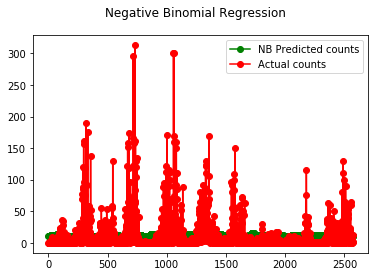

In [333]:
fig = plt.figure()
fig.suptitle('Negative Binomial Regression')
predicted, = plt.plot(X_test.index, NB_counts, 'go-', label='NB Predicted counts')
actual, = plt.plot(X_test.index, NB_actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

In [334]:
df_CEW_final.head()

,farm,trap_count,year,date,tempf,dwpf,drct,feel,regression_count,poisson_count,BB_LAMBDA,AUX_OLS_DEP
0,Pelham-G,0,2006,2006-06-19,70.977613,63.913169,63.703704,71.301399,10.459989,10.502287,10.502287,-1.0
1,Litchfield-W,0,2006,2006-06-19,70.977613,63.913169,63.703704,71.301399,10.459989,10.502287,10.502287,-1.0
2,Litchfield-M,0,2006,2006-06-19,70.977613,63.913169,63.703704,71.301399,10.459989,10.502287,10.502287,-1.0
3,Merrimack-T,0,2006,2006-06-19,70.977613,63.913169,63.703704,71.301399,10.459989,10.502287,10.502287,-1.0
4,Hollis-L,1,2006,2006-06-19,70.977613,63.913169,63.703704,71.301399,10.459989,10.502287,10.502287,-1.0


In [335]:
df_CEW_final['NB_count'] = NB_counts

In [336]:
#writing into the csv file
df_CEW_final.to_csv("CEW_predicted_count.csv", index = False, sep = ',')

# selecting weather dataframe within the date range - ECB Pest

In [177]:
print(search_ecb_STdate)
print(search_ecb_ENDdate)

2006-06-19 00:00:00
2018-10-15 00:00:00


In [178]:
df_equation_ECB = df_equation.loc[(df_equation['valid'] >= search_ecb_STdate) & (df_equation['valid'] <= search_ecb_ENDdate), :]

In [179]:
#need to get all the columns from here and sum up fro every week 
#select date and each column, and find the average for each column
df_tempf_ECB = df_equation_ECB[['tmpf','dwpf', 'drct','feel','valid']]
df_tempf_ECB["tmpf"] = df_tempf_ECB["tmpf"].fillna(0)
df_tempf_ECB["dwpf"] = df_tempf_ECB["dwpf"].fillna(0)
df_tempf_ECB["drct"] = df_tempf_ECB["drct"].fillna(0)
df_tempf_ECB["feel"] = df_tempf_ECB["feel"].fillna(0)

In [180]:
#calling getweekly_temperature
ECB_weather_data_dic = {}
getweekly_temperature(df_tempf_ECB,ECB_weather_data_dic)

total temperature index  642
total weeks:  47922


In [182]:
df_ECB_weather = pd.DataFrame(ECB_weather_data_dic)

In [189]:
df_ECB['date'] = df_ECB['date'].dt.date

In [190]:
#combining weather data and pest count data based on the date -----
#creating data frame needed for equation
df_ECB_weather['date'] = pd.to_datetime(df_ECB_weather['date'])
df_ECB_weather['date'] = df_ECB_weather['date'].dt.date
df_ECB_final = df_ECB.merge(df_ECB_weather, on='date')

In [191]:
df_ECB_final.head()

,farm,trap_count,year,date,tempf,dwpf,drct,feel
0,Litchfield-W,16,2006,2006-06-19,70.977613,63.913169,63.703704,71.301399
1,Hollis-B,7,2006,2006-06-19,70.977613,63.913169,63.703704,71.301399
2,Mason-B,11,2006,2006-06-19,70.977613,63.913169,63.703704,71.301399
3,Litchfield-W,25,2006,2006-06-26,71.243468,65.095887,84.233871,71.733347
4,Hollis-B,31,2006,2006-06-26,71.243468,65.095887,84.233871,71.733347


# predicting trap counts :::: ECB pest

In [192]:
#creating training and testign dataset 
mask_ecb = np.random.rand(len(df_ECB_final)) < 0.8
df_train_ECB = df_ECB_final[mask_ecb]
df_test_ECB = df_ECB_final[~mask_ecb]

In [194]:
expr_ECB = """trap_count ~ tempf + dwpf + drct + feel"""

In [197]:
#Set up the X and y matrices
y_train_ecb, X_train_ecb = dmatrices(expr_ECB, df_ECB_final, return_type='dataframe')
y_test_ecb, X_test_ecb = dmatrices(expr_ECB, df_ECB_final, return_type='dataframe')

In [199]:
#Using the statsmodels GLM class, train the Poisson regression model on the training data set.
poisson_training_results_ecb = sm.GLM(y_train_ecb, X_train_ecb, family=sm.families.Poisson()).fit()

In [200]:
print(poisson_training_results_ecb.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             trap_count   No. Observations:                 4020
Model:                            GLM   Df Residuals:                     4015
Model Family:                 Poisson   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20982.
Date:                Sun, 05 Apr 2020   Deviance:                       36540.
Time:                        23:28:44   Pearson chi2:                 8.28e+04
No. Iterations:                     6   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2365      0.070     17.763      0.000       1.100       1.373
tempf         -0.0035      0.004     -0.925      0.3

In [202]:
#Make some predictions on the test data set.
poisson_predictions_ecb = poisson_training_results_ecb.get_prediction(X_test_ecb)

In [203]:
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame_ecb = poisson_predictions_ecb.summary_frame()
print(predictions_summary_frame_ecb)

          mean   mean_se  mean_ci_lower  mean_ci_upper
0     3.484824  0.060365       3.368497       3.605168
1     3.484824  0.060365       3.368497       3.605168
2     3.484824  0.060365       3.368497       3.605168
3     3.420675  0.049845       3.324362       3.519779
4     3.420675  0.049845       3.324362       3.519779
5     3.420675  0.049845       3.324362       3.519779
6     2.625314  0.040086       2.547910       2.705069
7     2.625314  0.040086       2.547910       2.705069
8     2.625314  0.040086       2.547910       2.705069
9     3.686626  0.071031       3.550004       3.828506
10    3.686626  0.071031       3.550004       3.828506
11    3.686626  0.071031       3.550004       3.828506
12    3.244769  0.050942       3.146445       3.346165
13    3.244769  0.050942       3.146445       3.346165
14    3.244769  0.050942       3.146445       3.346165
15    3.111367  0.057636       3.000428       3.226408
16    3.111367  0.057636       3.000428       3.226408
17    3.11

In [204]:
predicted_counts_ecb=predictions_summary_frame_ecb['mean']
actual_counts_ecb = y_test_ecb['trap_count']

In [241]:
print(predicted_counts_ecb)

0       3.484824
1       3.484824
2       3.484824
3       3.420675
4       3.420675
5       3.420675
6       2.625314
7       2.625314
8       2.625314
9       3.686626
10      3.686626
11      3.686626
12      3.244769
13      3.244769
14      3.244769
15      3.111367
16      3.111367
17      3.111367
18      2.909125
19      2.909125
20      2.909125
21      2.155955
22      2.155955
23      2.155955
24      2.958304
25      2.958304
26      2.958304
27      3.267339
28      3.267339
29      3.267339
          ...   
3990    2.797668
3991    2.797668
3992    2.797668
3993    2.797668
3994    2.797668
3995    2.797668
3996    2.785602
3997    2.785602
3998    2.785602
3999    2.785602
4000    2.785602
4001    2.785602
4002    2.785602
4003    2.785602
4004    2.785602
4005    2.785602
4006    2.785602
4007    2.785602
4008    2.785602
4009    2.785602
4010    2.785602
4011    2.785602
4012    2.785602
4013    2.481624
4014    2.481624
4015    2.481624
4016    2.481624
4017    2.4816

In [206]:
print(actual_counts_ecb)

0       16.0
1        7.0
2       11.0
3       25.0
4       31.0
5        7.0
6        3.0
7        4.0
8        1.0
9       12.0
10       0.0
11       0.0
12       4.0
13       3.0
14       0.0
15       5.0
16      24.0
17       1.0
18      13.0
19      34.0
20       5.0
21      17.0
22      60.0
23       1.0
24       1.0
25      12.0
26       0.0
27       1.0
28       2.0
29       1.0
        ... 
3990     0.0
3991     0.0
3992     0.0
3993     0.0
3994     0.0
3995     0.0
3996     0.0
3997     5.0
3998     0.0
3999     0.0
4000     0.0
4001     0.0
4002     0.0
4003     8.0
4004     0.0
4005     0.0
4006     0.0
4007     0.0
4008     0.0
4009     0.0
4010     0.0
4011     0.0
4012     0.0
4013     0.0
4014     0.0
4015     0.0
4016     0.0
4017     0.0
4018     0.0
4019     0.0
Name: trap_count, Length: 4020, dtype: float64


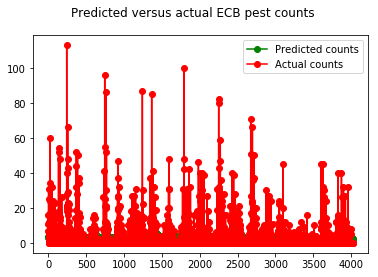

In [208]:
#Mlot the predicted counts versus the actual counts for the test data.
fig = plt.figure()
fig.suptitle('Predicted versus actual ECB pest counts ')
predicted, = plt.plot(X_test_ecb.index, predicted_counts_ecb, 'go-', label='Predicted counts')
actual, = plt.plot(X_test_ecb.index, actual_counts_ecb, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

In [210]:
df_ECB_final['predicted_counts_ecb'] = predicted_counts_ecb

In [211]:
#writing into the csv file
df_ECB_final.to_csv("ECB_predicted_count.csv", index = False, sep = ',')

# selecting weather dataframe within the date range - FAW Pest

In [224]:
print(search_faw_STdate)
print(search_faw_ENDdate)

2006-06-19 00:00:00
2018-10-15 00:00:00


In [225]:
df_equation_FAW = df_equation.loc[(df_equation['valid'] >= search_faw_STdate) & (df_equation['valid'] <= search_faw_ENDdate), :]

In [226]:
#need to get all the columns from here and sum up fro every week 
#select date and each column, and find the average for each column
df_tempf_FAW = df_equation_FAW[['tmpf','dwpf', 'drct','feel','valid']]
df_tempf_FAW["tmpf"] = df_tempf_FAW["tmpf"].fillna(0)
df_tempf_FAW["dwpf"] = df_tempf_FAW["dwpf"].fillna(0)
df_tempf_FAW["drct"] = df_tempf_FAW["drct"].fillna(0)
df_tempf_FAW["feel"] = df_tempf_FAW["feel"].fillna(0)

In [227]:
#calling getweekly_temperature
FAW_weather_data_dic = {}
getweekly_temperature(df_tempf_FAW,FAW_weather_data_dic)

total temperature index  642
total weeks:  47922


In [228]:
df_FAW_weather = pd.DataFrame(FAW_weather_data_dic)

In [229]:
#convert orginal faw date into correct dataframe date
df_FAW['date'] = df_FAW['date'].dt.date

In [230]:
#combining weather data and pest count data based on the date -----
#creating data frame needed for equation
df_FAW_weather['date'] = pd.to_datetime(df_FAW_weather['date'])
df_FAW_weather['date'] = df_FAW_weather['date'].dt.date
df_FAW_final = df_FAW.merge(df_FAW_weather, on='date')

In [232]:
df_FAW_final.head()

,farm,trap_count,year,date,tempf,dwpf,drct,feel
0,Pelham-G,0,2006,2006-06-19,70.977613,63.913169,63.703704,71.301399
1,Litchfield-W,0,2006,2006-06-19,70.977613,63.913169,63.703704,71.301399
2,Litchfield-M,0,2006,2006-06-19,70.977613,63.913169,63.703704,71.301399
3,Merrimack-T,0,2006,2006-06-19,70.977613,63.913169,63.703704,71.301399
4,Hollis-L,0,2006,2006-06-19,70.977613,63.913169,63.703704,71.301399


# predicting trap counts :::: FAW pest

In [233]:
#creating training and testign dataset 
mask_faw = np.random.rand(len(df_FAW_final)) < 0.8
df_train_FAW = df_FAW_final[mask_faw]
df_test_FAW = df_FAW_final[~mask_faw]

In [234]:
expr_FAW = """trap_count ~ tempf + dwpf + drct + feel"""

In [235]:
#Set up the X and y matrices
y_train_faw, X_train_faw = dmatrices(expr_FAW, df_FAW_final, return_type='dataframe')
y_test_faw, X_test_faw = dmatrices(expr_FAW, df_FAW_final, return_type='dataframe')

In [236]:
#Using the statsmodels GLM class, train the Poisson regression model on the training data set.
poisson_training_results_faw = sm.GLM(y_train_faw, X_train_faw, family=sm.families.Poisson()).fit()

In [237]:
print(poisson_training_results_faw.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             trap_count   No. Observations:                 2634
Model:                            GLM   Df Residuals:                     2629
Model Family:                 Poisson   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13336.
Date:                Mon, 06 Apr 2020   Deviance:                       23704.
Time:                        08:28:51   Pearson chi2:                 7.29e+04
No. Iterations:                     6   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0710      0.084     12.699      0.000       0.906       1.236
tempf          0.0774      0.011      7.154      0.0

In [238]:
#Make some predictions on the test data set.
poisson_predictions_faw = poisson_training_results_faw.get_prediction(X_test_faw)

In [239]:
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame_faw = poisson_predictions_faw.summary_frame()
print(predictions_summary_frame_faw)

          mean   mean_se  mean_ci_lower  mean_ci_upper
0     1.901839  0.048888       1.808393       2.000113
1     1.901839  0.048888       1.808393       2.000113
2     1.901839  0.048888       1.808393       2.000113
3     1.901839  0.048888       1.808393       2.000113
4     1.901839  0.048888       1.808393       2.000113
5     1.901839  0.048888       1.808393       2.000113
6     1.901839  0.048888       1.808393       2.000113
7     1.901839  0.048888       1.808393       2.000113
8     1.901839  0.048888       1.808393       2.000113
9     1.901839  0.048888       1.808393       2.000113
10    1.901839  0.048888       1.808393       2.000113
11    1.681121  0.038086       1.608107       1.757450
12    1.681121  0.038086       1.608107       1.757450
13    1.681121  0.038086       1.608107       1.757450
14    1.681121  0.038086       1.608107       1.757450
15    1.681121  0.038086       1.608107       1.757450
16    1.681121  0.038086       1.608107       1.757450
17    1.68

In [240]:
predicted_counts_faw=predictions_summary_frame_faw['mean']
actual_counts_faw = y_test_faw['trap_count']

In [242]:
print(predicted_counts_faw)

0       1.901839
1       1.901839
2       1.901839
3       1.901839
4       1.901839
5       1.901839
6       1.901839
7       1.901839
8       1.901839
9       1.901839
10      1.901839
11      1.681121
12      1.681121
13      1.681121
14      1.681121
15      1.681121
16      1.681121
17      1.681121
18      1.681121
19      1.681121
20      1.681121
21      1.681121
22      3.362671
23      3.362671
24      3.362671
25      3.362671
26      3.362671
27      3.362671
28      3.362671
29      3.362671
          ...   
2604    2.568579
2605    2.568579
2606    2.566849
2607    2.566849
2608    2.566849
2609    2.566849
2610    2.566849
2611    2.566849
2612    2.566849
2613    2.566849
2614    2.566849
2615    2.566849
2616    2.566849
2617    2.566849
2618    2.566849
2619    2.566849
2620    2.566849
2621    2.566849
2622    2.566849
2623    2.566849
2624    2.479989
2625    2.479989
2626    2.479989
2627    2.479989
2628    2.479989
2629    2.479989
2630    2.479989
2631    2.4799

In [243]:
print(actual_counts_faw)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
        ... 
2604     1.0
2605     0.0
2606     5.0
2607    16.0
2608    32.0
2609     0.0
2610     2.0
2611     0.0
2612     0.0
2613     2.0
2614    22.0
2615    10.0
2616     0.0
2617     0.0
2618     0.0
2619     1.0
2620     2.0
2621     0.0
2622     1.0
2623     0.0
2624     0.0
2625     2.0
2626     0.0
2627     0.0
2628     0.0
2629     2.0
2630     0.0
2631     2.0
2632     0.0
2633     0.0
Name: trap_count, Length: 2634, dtype: float64


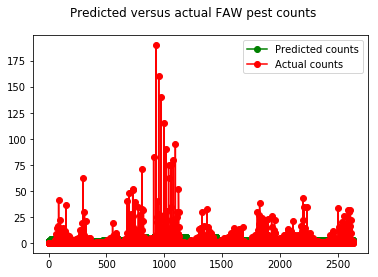

In [245]:
#Mlot the predicted counts versus the actual counts for the test data.
fig = plt.figure()
fig.suptitle('Predicted versus actual FAW pest counts ')
predicted, = plt.plot(X_test_faw.index, predicted_counts_faw, 'go-', label='Predicted counts')
actual, = plt.plot(X_test_faw.index, actual_counts_faw, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

In [246]:
df_FAW_final['predicted_counts_faw'] = predicted_counts_faw

In [247]:
#writing into the csv file
df_FAW_final.to_csv("FAW_predicted_count.csv", index = False, sep = ',')